**Name:** <span style="color:red">Maria Cobo and Alba Mas</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 4

# Positive feedback


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objective of this practical is to explore the behaviour of a system with a positive feedback motif. In particular, we will use numerical integration of an ordinary differential equation model to analyze the behavior of a phosphorylation/dephosphorylation cycle as the kinase concentration (acting as input signal) is cycled from a low to a high level and back.

Consider the phosphorylation/dephosphorylation cycle shown in the figure
below, in which phosphorylation is induced by both a stimulus signal
$S$ and by the phosphorylated protein itself, in the form of a positive
feedback loop. Assuming that the latter process is cooperative, the
model of this system can be written as:

<img style="margin: 20px; float: right" src="http://dsb.upf.edu/biocomp/figs/irrevers.png" width="15%"/>

$$\frac{dA_p}{dt}=k_p SA+\beta\frac{A_p^n}{K^n+A_p^n}-k_dA_p$$

where
$k_p$ is the activation (phosphorylation) rate, $k_d$ is the
inactivation (dephosphorylation) rate, $A$ is the concentration of the
unphosphorylated protein, and $A_p$ is the concentration of the
phosphorylated protein.
We will assume that the total protein concentration, $A_T=A+A_p$, is
constant. We will consider the following parameter values: $K=50$,
$A_T=100$, $k_d=0.11$, $\beta=10$, $k_p=0.1$, and $n=4$.

In [56]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# Write your code here
K=50
At=100
kd = 0.11
beta=10
kp=0.1
n=4

First, integrate numerically, up to $t=100$, the differential equation
above for a low (basal) stimulus level, such as $S=0.01$, assuming
that initially the protein is completely unphosphorylated.

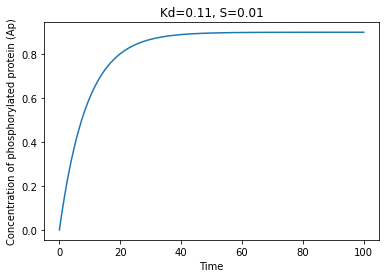

In [58]:
S=0.01

def activation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp

# Initial condition (initially all protein is unphosphorylated)
Ap0 = 0 

# Time points for integration
t = np.linspace(0, 100, 1000)  # Time from 0 to 100 in 1000 steps

# Solve the ODE
Ap_solution = odeint(activation, Ap0, t, args=(K, At, kd, beta, kp, n, S))

# Plot the results
plt.plot(t, Ap_solution)
plt.xlabel('Time')
plt.ylabel('Concentration of phosphorylated protein (Ap)')
plt.title('Kd=0.11, S=0.01')
plt.show()

---

<span style="color:red">Comment your result here</span>

We can observe how the concentration of Ap increases until reaching it's maximum concentration (beta=10)

---

Nest, starting from the stationary situation obtained in the previous
case, study the effect of suddenly applying a large stimulus signal,
so that $S$ suddenly jumps to a high level, such as $S=1$.

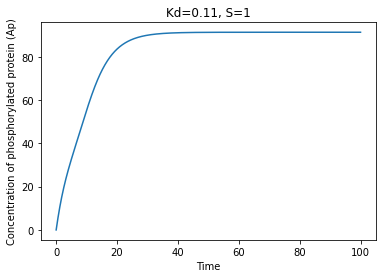

In [59]:
S=1

def activation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp

# Initial condition (initially all protein is unphosphorylated)
Ap0 = 0 

# Time points for integration
t = np.linspace(0, 100, 1000)  # Time from 0 to 100 in 1000 steps

# Solve the ODE
Ap_solution = odeint(activation, Ap0, t, args=(K, At, kd, beta, kp, n, S))

# Plot the results
plt.plot(t, Ap_solution)
plt.xlabel('Time')
plt.ylabel('Concentration of phosphorylated protein (Ap)')
plt.title('Kd=0.11, S=1')
plt.show()

---

<span style="color:red">Comment your result here</span>

We can see how by increasing S the curve is a little more sharp, the bigger is S the sharper the curve will be.

---

Next, starting from the latest stationary situation, integrate
the equations again for $S=0.01$. Does the system go back to its
original state?

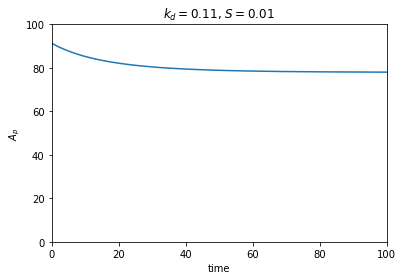

In [60]:
def activation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp

# Initial condition (initially all protein is unphosphorylated)
Ap0 = 0 

# Time points for integration
t = np.linspace(0, 100, 1000)  

#Pashe 1
S1 = 0.01
Ap_solution1 = odeint(activation, Ap0, t, args=(K, At, kd, beta, kp, n, S1))

# Phase 2: Sudden large stimulus (S = 1)
S2 = 1
Ap_solution2 = odeint(activation, Ap_solution1[-1], t, args=(K, At, kd, beta, kp, n, S2))


# Phase 3: Return to low stimulus (S = 0.01) after a high stimulus phase
Ap_solution3 = odeint(activation, Ap_solution2[-1], t, args=(K, At, kd, beta, kp, n, 0.01))

# Plot the results for the third phase only
plt.figure(figsize=(6, 4))
plt.plot(t, Ap_solution3, label=r'$A_p$')
plt.xlabel('time')
plt.ylabel(r'$A_p$')
plt.title(r'$k_d=0.11$, $S=0.01$')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

---

<span style="color:red">Comment your result here</span>

The system does not return to 0 because it's in the high-phosphorylation steady state due to bistability. We need to significantly reduce S to a value where the system prefers the low-phosphorylation state again. 

---

Finally, continue further to $S=0$, thus eliminating the stimulus
completely. Does the system now go back to its original
state? 

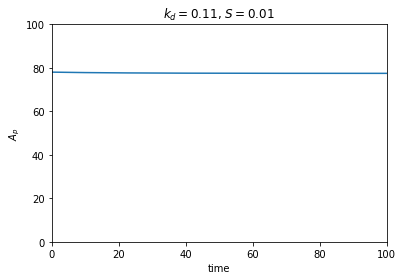

In [61]:
def activation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp

# Initial condition (initially all protein is unphosphorylated)
Ap0 = 0 

# Time points for integration
t = np.linspace(0, 100, 1000)  

#Phase 4: S=0, eliminating stimulus.
Ap_solution4 = odeint(activation, Ap_solution3[-1], t, args=(K, At, kd, beta, kp, n, 0))

# Plot the results for the third phase only
plt.figure(figsize=(6, 4))
plt.plot(t, Ap_solution4, label=r'$A_p$')
plt.xlabel('time')
plt.ylabel(r'$A_p$')
plt.title(r'$k_d=0.11$, $S=0.01$')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

---

<span style="color:red">Comment your result here</span>

Even after removing the stimulus entirely S=0, if the system is in the high-phosphorylation steady state, it may remain stuck in this state. This is because in systems with positive feedback and bistability, the high-phosphorylation state can remain stable even without an external stimulus. The system has memory, once in the high state, it stays there unless forced back.

---

Now we will manually compute a bifurcation diagram of the system. 
In order to do this, choose a range of S values from 0 to 1. Start for S=0 considering that the protein is unphosphorylated at the beginning. Then, for each S value do a simulation starting each integration at the previous steady state, and save the new steady state value. Plot the results in a graph where the x axis is S, and the y axis is the steady state reached (from each simulation). Then do the same but in reverse order (starting from high S) and plot the results in a different color.

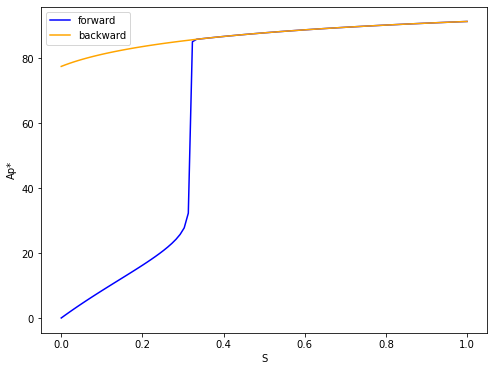

In [62]:
# Define the differential equation
def phosphorylation_dephosphorylation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp_dt = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp_dt

# Function to find steady state
def find_steady_state(S, Ap0, t_final=100, num_points=1000):
    t = np.linspace(0, t_final, num_points)  # Time array
    Ap_solution = odeint(phosphorylation_dephosphorylation, Ap0, t, args=(K, At, kd, beta, kp, n, S))
    return Ap_solution[-1]  # Return the last value as the steady state

# Range of S values
S_values = np.linspace(0, 1, 100)  # S from 0 to 1
Ap_steady_increasing = []
Ap_steady_decreasing = []

# Initial condition (unphosphorylated protein at S=0)
Ap0 = 0

# Forward pass: Increase S from 0 to 1
for S in S_values:
    Ap_steady = find_steady_state(S, Ap0)
    Ap_steady_increasing.append(Ap_steady)
    Ap0 = Ap_steady  # Use the steady state as the initial condition for the next S

# Reverse pass: Decrease S from 1 to 0
Ap0 = Ap_steady_increasing[-1]  # Start from the final steady state of the increasing phase
for S in reversed(S_values):
    Ap_steady = find_steady_state(S, Ap0)
    Ap_steady_decreasing.append(Ap_steady)
    Ap0 = Ap_steady  # Use the steady state as the initial condition for the next S

# Plot the bifurcation diagram
plt.figure(figsize=(8, 6))
plt.plot(S_values, Ap_steady_increasing, label='forward', color='blue')
plt.plot(S_values, Ap_steady_decreasing[::-1], label='backward', color='orange')  # Reverse back the decreasing list for plotting
plt.xlabel('S')
plt.ylabel('Ap*')
plt.legend()
plt.show()


---

<span style="color:red">Comment your results here.</span>

This bifurcation diagram reveals that the system exhibits hysteresis: the steady-state values of Ap​ for increasing S differ from those for decreasing S. In practical terms, this could suggest that once the protein is phosphorylated to a high level, it requires much lower values of S to become unphosphorylated than were needed to phosphorylate it in the first place.

---

Finally, repeat the analysis above for $k_d=0.13$. First, integrate for fixed values of $S$ (increasing first from $S=0.01$ to $S=1$, and then decreasing back to $S=0.01$ and $S=0$), starting in each case from the previous steady state. Comment on the differences with respect to the case $k_d=0.11$.

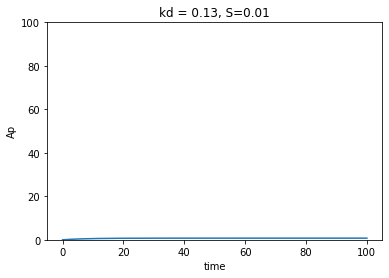

In [63]:
def activation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp

# kd = 0.13 case and S = 0.01
kd = 0.13  # Dephosphorylation rate constant
S = 0.01   # Stimulus value

# Initial condition (initially all protein is unphosphorylated)
Ap0 = 0

# Time points for integration (longer time to reach steady state)
t = np.linspace(0, 100, 1000)  # Time from 0 to 1000 in 10000 steps

# Solve the ODE for kd = 0.13 and S = 0.01
Ap_solution = odeint(activation, Ap0, t, args=(K, At, kd, beta, kp, n, S))

# Plot the solution for kd = 0.13 and S = 0.01
plt.plot(t, Ap_solution, label=f'kd={kd}, S={S}')
plt.xlabel('time')
plt.ylabel('Ap')
plt.ylim(0, 80)  # Ensuring the y-axis goes from 0 to 80
plt.yticks(np.arange(0, 101, 20))
plt.title(f'kd = {kd}, S={S}')
plt.show()

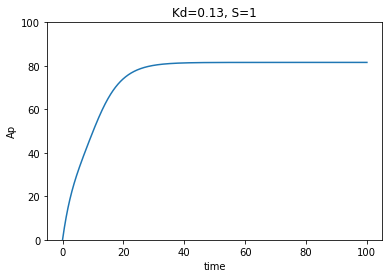

In [64]:
S=1

def activation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp

# Initial condition (initially all protein is unphosphorylated)
Ap0 = 0 

# Time points for integration
t = np.linspace(0, 100, 1000)  # Time from 0 to 100 in 1000 steps

# Solve the ODE
Ap_solution = odeint(activation, Ap0, t, args=(K, At, kd, beta, kp, n, S))

# Plot the results
plt.plot(t, Ap_solution)
plt.xlabel('time')
plt.ylabel('Ap')
plt.title('Kd=0.13, S=1')
plt.ylim(0, 100)
plt.show()

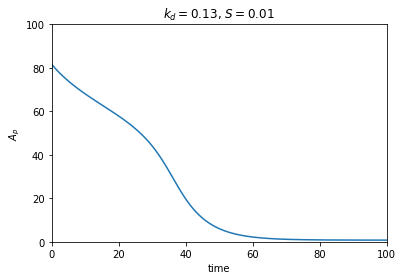

In [65]:
def activation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp

# Initial condition (initially all protein is unphosphorylated)
Ap0 = 0 

# Time points for integration
t = np.linspace(0, 100, 1000)  

#Pashe 1
S1 = 0.01
Ap_solution1 = odeint(activation, Ap0, t, args=(K, At, kd, beta, kp, n, S1))

# Phase 2: Sudden large stimulus (S = 1)
S2 = 1
Ap_solution2 = odeint(activation, Ap_solution1[-1], t, args=(K, At, kd, beta, kp, n, S2))


# Phase 3: Return to low stimulus (S = 0.01) after a high stimulus phase
Ap_solution3 = odeint(activation, Ap_solution2[-1], t, args=(K, At, kd, beta, kp, n, 0.01))

# Plot the results for the third phase only
plt.figure(figsize=(6, 4))
plt.plot(t, Ap_solution3, label=r'$A_p$')
plt.xlabel('time')
plt.ylabel(r'$A_p$')
plt.title(r'$k_d=0.13$, $S=0.01$')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

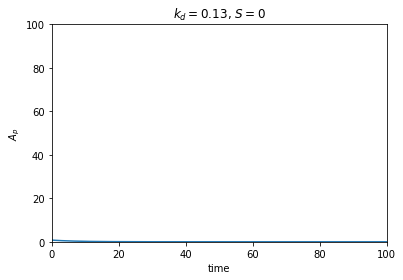

In [66]:
S=0
def activation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp

# Initial condition (initially all protein is unphosphorylated)
Ap0 = 0 

# Time points for integration
t = np.linspace(0, 100, 1000)  

#Phase 4: S=0, eliminating stimulus.
Ap_solution4 = odeint(activation, Ap_solution3[-1], t, args=(K, At, kd, beta, kp, n, 0))

# Plot the results for the third phase only
plt.figure(figsize=(6, 4))
plt.plot(t, Ap_solution4, label=r'$A_p$')
plt.xlabel('time')
plt.ylabel(r'$A_p$')
plt.title(r'$k_d=0.13$, $S=0$')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

---

<span style="color:red">Comment your result here</span>

The first plot, with S=0.01 and Kd=0.13, has a very small S which leads to a slow buildup of Ap. Ap remains very low throughot The simulation time, showing minimal dynamics. 

The second plot, with S=1 and Kd=0.13, as S increases, Ap has a rapid rise reaching steaty-state new 100 after some time. here, the system's response is much fatser and more significant compared to the sustym with S=0.01. Then, this tells us that increasing S, the system activates more strongly. 

In the third plot, where after reaching steady state for S=1 and going back to S=0.01. In response, Ap gradually decreases over time, eventually approaching zero. This shows that as S is being reduced, Ap decreases too. 

Finally, the fourth plot, with S=0, Ap stays with a very low value throughout the time, like in the first plot. The system remains in an inactive state as no input signal is present (no accumulation/activity of Ap)

---

Finally, calculate numerically the bifurcation diagram for $k_d=0.13$ and compare it again with the case $k_d=0.11$.

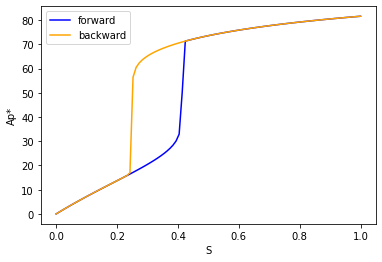

In [67]:
kd = 0.13 

# Define the differential equation
def phosphorylation_dephosphorylation(Ap, t, K, At, kd, beta, kp, n, S):
    A = At - Ap  # Unphosphorylated protein
    dAp_dt = kp * S * A + (beta * Ap**n / (K**n + Ap**n)) - kd * Ap
    return dAp_dt

# Function to find steady state
def find_steady_state(S, Ap0, t_final=100, num_points=1000):
    t = np.linspace(0, t_final, num_points)  # Time array
    Ap_solution = odeint(phosphorylation_dephosphorylation, Ap0, t, args=(K, At, kd, beta, kp, n, S))
    return Ap_solution[-1]  # Return the last value as the steady state

# Range of S values
S_values = np.linspace(0, 1, 100)  # S from 0 to 1
Ap_steady_increasing = []
Ap_steady_decreasing = []

# Initial condition (unphosphorylated protein at S=0)
Ap0 = 0

# Forward pass: Increase S from 0 to 1
for S in S_values:
    Ap_steady = find_steady_state(S, Ap0)
    Ap_steady_increasing.append(Ap_steady)
    Ap0 = Ap_steady  # Use the steady state as the initial condition for the next S

# Reverse pass: Decrease S from 1 to 0
Ap0 = Ap_steady_increasing[-1]  # Start from the final steady state of the increasing phase
for S in reversed(S_values):
    Ap_steady = find_steady_state(S, Ap0)
    Ap_steady_decreasing.append(Ap_steady)
    Ap0 = Ap_steady  # Use the steady state as the initial condition for the next S

# Plot the bifurcation diagram
plt.figure()
plt.plot(S_values, Ap_steady_increasing, label='forward', color='blue')
plt.plot(S_values, Ap_steady_decreasing[::-1], label='backward', color='orange')  # Reverse back the decreasing list for plotting
plt.xlabel('S')
plt.ylabel('Ap*')
plt.legend()
plt.show()

---

<span style="color:red">Comment your result here</span>

This diagram is a clear representation of a system with strong bistability and hysteresis, where the rate of dephosphorylation (kd​) significantly affects the bifurcation point and the extent of hysteresis. Increasing kd​ seems to push the transition points further apart.

---